In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.colors import Normalize
import os
import math
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import matplotlib.gridspec as gridspec

In [3]:
mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['ytick.labelsize'] = 20
mpl.rcParams.update({'font.size': 20})

In [4]:
def stateThresholds():
    return {'mz':[179.928,592.86]
            ,'u':[4322.72,15365.41],
            'h':[126.85,381.53],
            'A':[163.02,385.53]}

#### Metabolic Phenotypes

{'A': 436.47213160474945, 'Rnox': 1.6461845679152642, 'Rmt': 128.97826781691597, 'h': 26.69259410719074}

{'A': 385.53355124455993, 'Rnox': 2.857316799224224, 'Rmt': 137.55212530487026, 'h': 126.85433451255018}

{'A': 327.50827624867554, 'Rnox': 8.970170738431756, 'Rmt': 138.2393863317781, 'h': 292.59779290727334}

{'A': 163.0219643626051, 'Rnox': 21.429749060524145, 'Rmt': 54.95997630766442, 'h': 381.53445469342324} 

{'A': 68.67768314578954, 'Rnox': 30.525042671185414, 'Rmt': 8.353361802666083, 'h': 480.4124463778733} 



#### EMT phenotypes

'u': 1265.0145554683656, 'ms': 451.1540645013371, 'u3': 8177.938943062448, 'mz': 990.4010240761947},

'u': 4322.718712975423, 'ms': 457.2059660505549, 'u3': 14831.841141418037, 'mz': 592.8640392330298},

'u': 12389.217608300634, 'ms': 458.4642670196209, 'u3': 16908.617669803563, 'mz': 301.84367817798204}, 

'u': 15365.410894097318, 'ms': 458.5016342609288, 'u3': 16975.501915824585, 'mz': 179.92788317173316})

'u': 19098.53802971536, 'ms': 458.5115606841859, 'u3': 16993.323702636688, 'mz': 62.206071606052106},


In [5]:
def getStates(df_res,thresh):
            
    E = (df_res['u']>thresh['u'][1])*(df_res['mz']<=thresh['mz'][0])
    M = (df_res['u']<=thresh['u'][0])*(df_res['mz']>thresh['mz'][1])
    EM =(df_res['u']>thresh['u'][0])*(df_res['u']<=thresh['u'][1])*(df_res['mz']>thresh['mz'][0])*(df_res['mz']<=thresh['mz'][1])
    
    
    O = (df_res['A']>thresh['A'][1])*(df_res['h']<=thresh['h'][0])
    W = (df_res['A']<=thresh['A'][0])*(df_res['h']>thresh['h'][1])
    WO =(df_res['A']>thresh['A'][0])*(df_res['A']<=thresh['A'][1])*(df_res['h']>thresh['h'][0])*(df_res['h']<=thresh['h'][1])
    
    results={'E/O':np.sum(E*O),'E/WO':np.sum(E*WO),'E/W':np.sum(E*W),
             'M/O':np.sum(M*O),'M/WO':np.sum(M*WO),'M/W':np.sum(M*W),
             'EM/O':np.sum(EM*O),'EM/WO':np.sum(EM*WO),'EM/W':np.sum(EM*W),
             'E':np.sum(E),'EM':np.sum(EM),'M':np.sum(M),
             'O':np.sum(O),'WO':np.sum(WO),'W':np.sum(W)}
    
    maxV = np.max(results.values())
    return results,maxV

In [6]:
def plotValuesEMTvMR(df,thresholds,overlay=True):
    if len(df)<990:
        return
    else:
        fig,(ax1,ax2) = plt.subplots(1,2,figsize=(20,11))
        plt.subplots_adjust(hspace=0.2,wspace=0.5)

        labels={"u":"$\mu_{200}$",'mz':'Zeb mNRA','A':'AMPK','h':'Hif-1'}
        x1L = 'u'
        x2L = 'A'
        y1L='h'
        y2L='mz'

        if overlay:
            df_comp =pd.read_csv("../coupledWReg_Ccode/crosstalk_comparison/EMT_MR_comp_0_1000_res.txt").dropna()
            ax1.plot(df_comp[x1L].values,df_comp[y1L].values,"ro",markersize=10)
            ax2.plot(df_comp[x2L].values,df_comp[y2L].values,"ro",markersize=10)

        ax1.plot(df[x1L].values,df[y1L].values,"ko",markersize=10)
        ax2.plot(df[x2L].values,df[y2L].values,"ko",markersize=10)

        x1v=np.arange(0,20000)
        x2v=np.arange(0,600)
        y1v=np.arange(0,600)
        y2v=np.arange(0,1200)
        y1a= thresholds[y1L][0]
        y1b= thresholds[y1L][1]
        x1a= thresholds[x1L][0]
        x1b= thresholds[x1L][1]

        y2a= thresholds[y2L][0]
        y2b=thresholds[y2L][1]
        x2a= thresholds[x2L][0]
        x2b= thresholds[x2L][1]

        ax1.fill_between(x1v,y1a, y1b,facecolor='red',alpha=0.4)#
        ax1.fill_betweenx(y1v,x1a, x1b,facecolor='blue',alpha=0.4)#
        ax1.set_xlabel(labels[x1L])
        ax1.set_ylabel(labels[y1L])

        ax2.fill_between(x2v,y2a, y2b,facecolor='red',alpha=0.4)#
        ax2.fill_betweenx(y2v,x2a, x2b,facecolor='blue',alpha=0.4)#
        ax2.set_xlabel(labels[x2L])
        ax2.set_ylabel(labels[y2L])

        #ax1.set_xlim(np.min(x1v),np.max(x1v))
        #ax1.set_ylim(np.min(y1v),np.max(y1v))
        #ax2.set_xlim(np.min(x2v),np.max(x2v))
        #ax2.set_ylim(np.min(y2v),np.max(y2v))

        plt.text(.1, 1.05 , 'M', horizontalalignment='center',verticalalignment='center', transform=ax1.transAxes)
        plt.text(.35, 1.05 , 'EM', horizontalalignment='center',verticalalignment='center', transform=ax1.transAxes)
        plt.text(.7, 1.05 , 'E', horizontalalignment='center',verticalalignment='center', transform=ax1.transAxes)
        plt.text(1.05,.8, 'M', horizontalalignment='center',verticalalignment='center', transform=ax2.transAxes)
        plt.text(1.05,.4, 'EM', horizontalalignment='center',verticalalignment='center', transform=ax2.transAxes)
        plt.text(1.05,.1, 'E', horizontalalignment='center',verticalalignment='center', transform=ax2.transAxes)


        plt.text(1.05,.8, 'W', horizontalalignment='center',verticalalignment='center', transform=ax1.transAxes)
        plt.text(1.05,.5, 'WO', horizontalalignment='center',verticalalignment='center', transform=ax1.transAxes)
        plt.text(1.05,.1, 'O', horizontalalignment='center',verticalalignment='center', transform=ax1.transAxes)
        plt.text(.2, 1.05 , 'W', horizontalalignment='center',verticalalignment='center', transform=ax2.transAxes)
        plt.text(.55, 1.05 , 'WO', horizontalalignment='center',verticalalignment='center', transform=ax2.transAxes)
        plt.text(.85, 1.05 , 'O', horizontalalignment='center',verticalalignment='center', transform=ax2.transAxes)

        plt.show()


## set 1

li=[1.,1.,1.,]

ymih=[0,0,0]

yuih=[0,0,0]


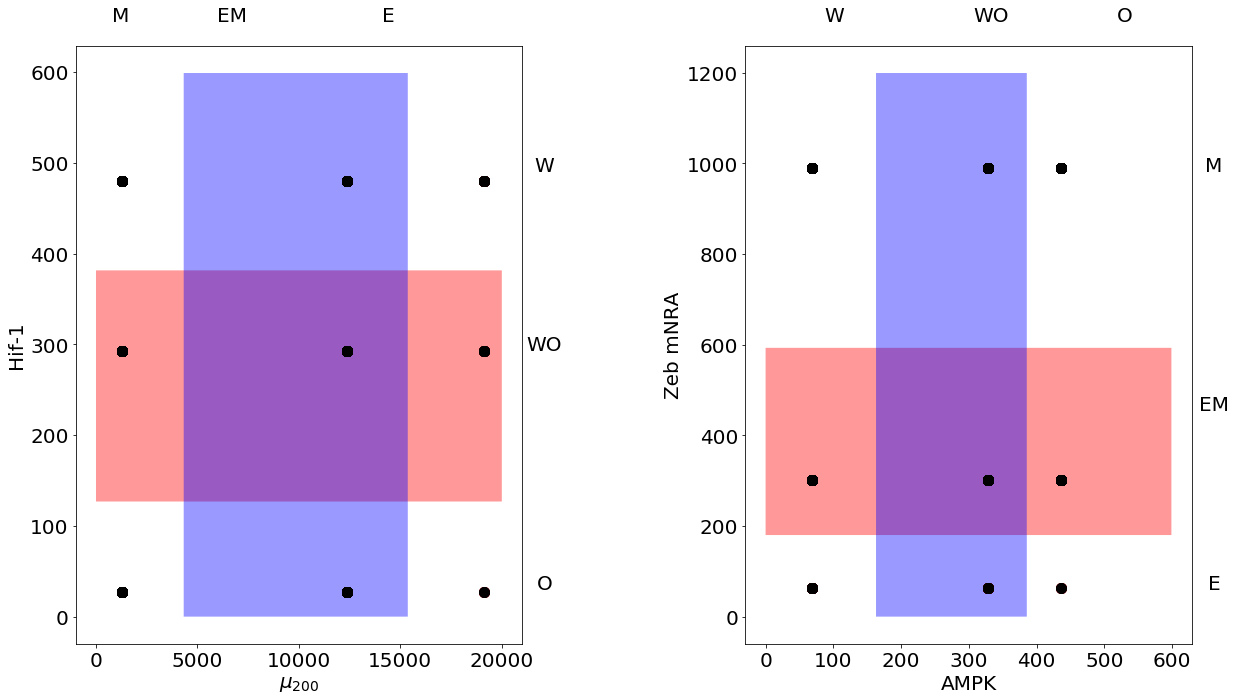

In [7]:
df =pd.read_csv("~/Research/EMT_MR/crosstalk/check/EMT_MR_lamdauH_set1__1000_res.txt").dropna()
plotValuesEMTvMR(df,stateThresholds())

## set 2

li=[1.,1.,1.,]

ymih=[0,0.1,0.2]

yuih=[0,0,0]


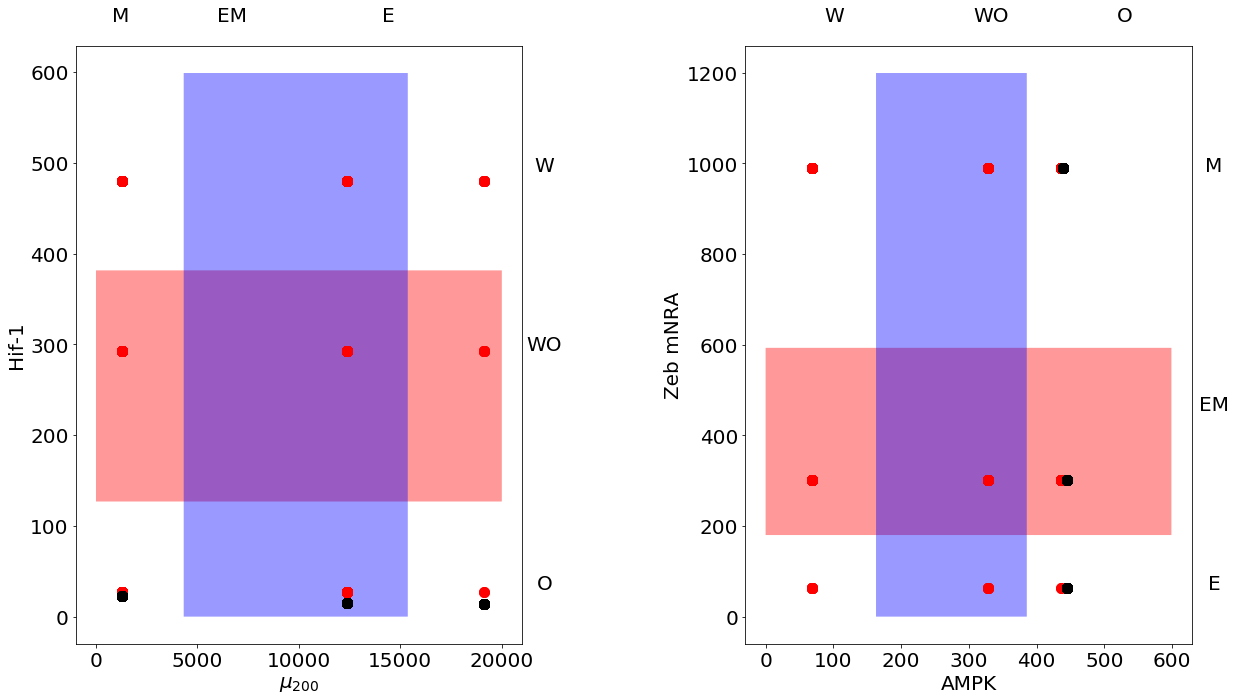

In [8]:
df =pd.read_csv("~/Research/EMT_MR/crosstalk/check/EMT_MR_lamdauH_set2__1000_res.txt").dropna()
plotValuesEMTvMR(df,stateThresholds())

## set 3

li=[1.,1.,1.,]

ymih=[0,0,0]

yuih=[0,0.1,0.2]


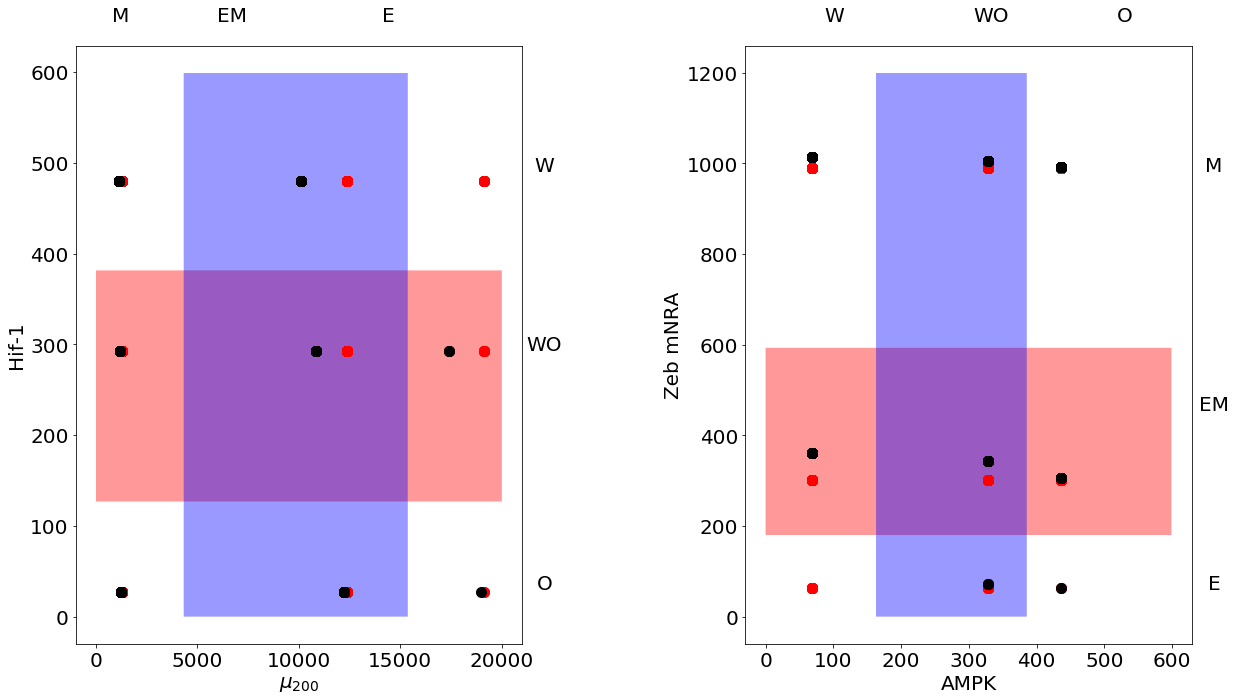

In [9]:
df =pd.read_csv("~/Research/EMT_MR/crosstalk/check/EMT_MR_lamdauH_set3__1000_res.txt").dropna()
plotValuesEMTvMR(df,stateThresholds())

## set 4

li=[1.,1.,1.,]

ymih=[0,0.01,0.02]

yuih=[0,0,0]


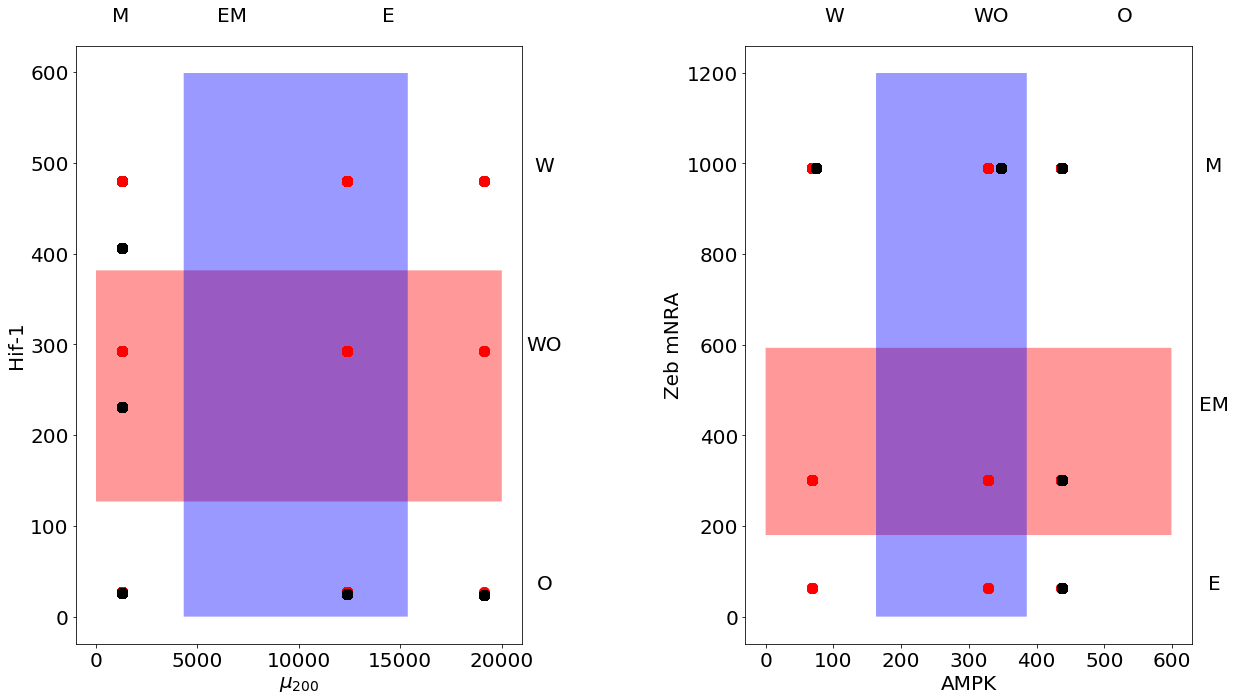

In [10]:
df =pd.read_csv("~/Research/EMT_MR/crosstalk/check/EMT_MR_lamdauH_set4__1000_res.txt").dropna()
plotValuesEMTvMR(df,stateThresholds())

## set 5

li=[1.,1.,1.,]

ymih=[0,0,0]

yuih=[0,0.01,0.02]


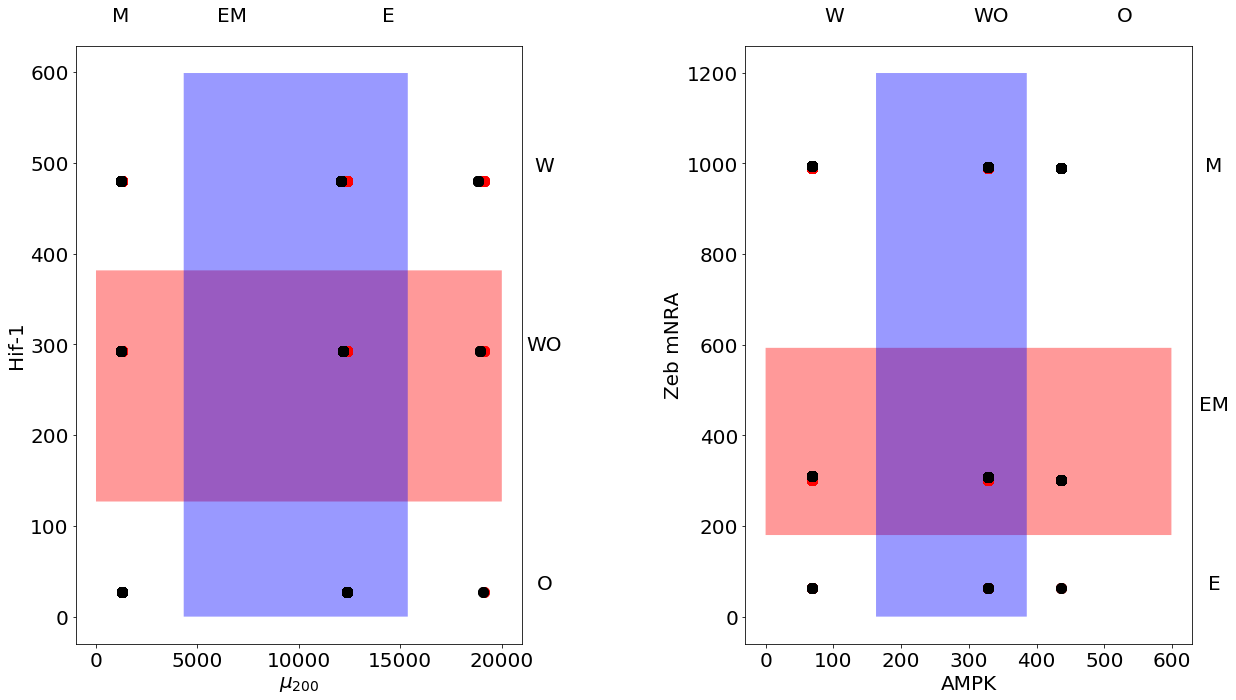

In [11]:
df =pd.read_csv("~/Research/EMT_MR/crosstalk/check/EMT_MR_lamdauH_set5__1000_res.txt").dropna()
plotValuesEMTvMR(df,stateThresholds())

## set 6

li=[1.,1.,1.,]

ymih=[0,0.001,0.002]

yuih=[0,0,0]


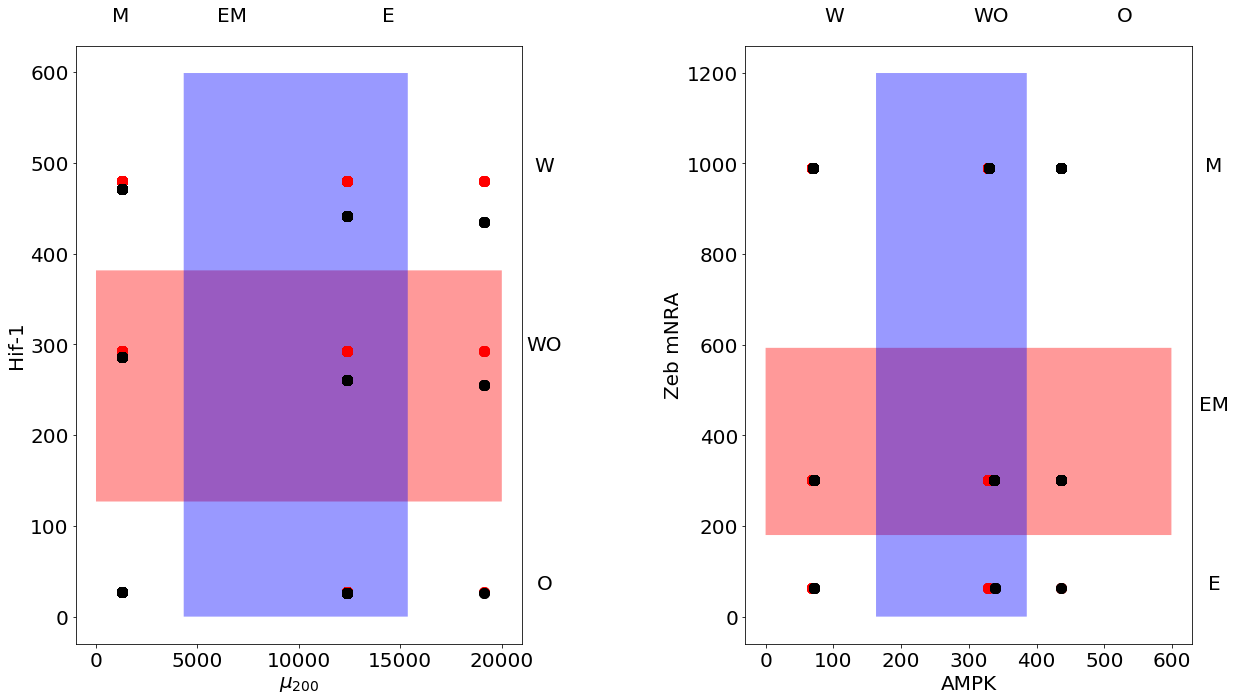

In [12]:
df =pd.read_csv("~/Research/EMT_MR/crosstalk/check/EMT_MR_lamdauH_set6__1000_res.txt").dropna()
plotValuesEMTvMR(df,stateThresholds())

## set 7

li=[1.,1.,1.,]

ymih=[0,0.003,0.005]

yuih=[0,0,0]


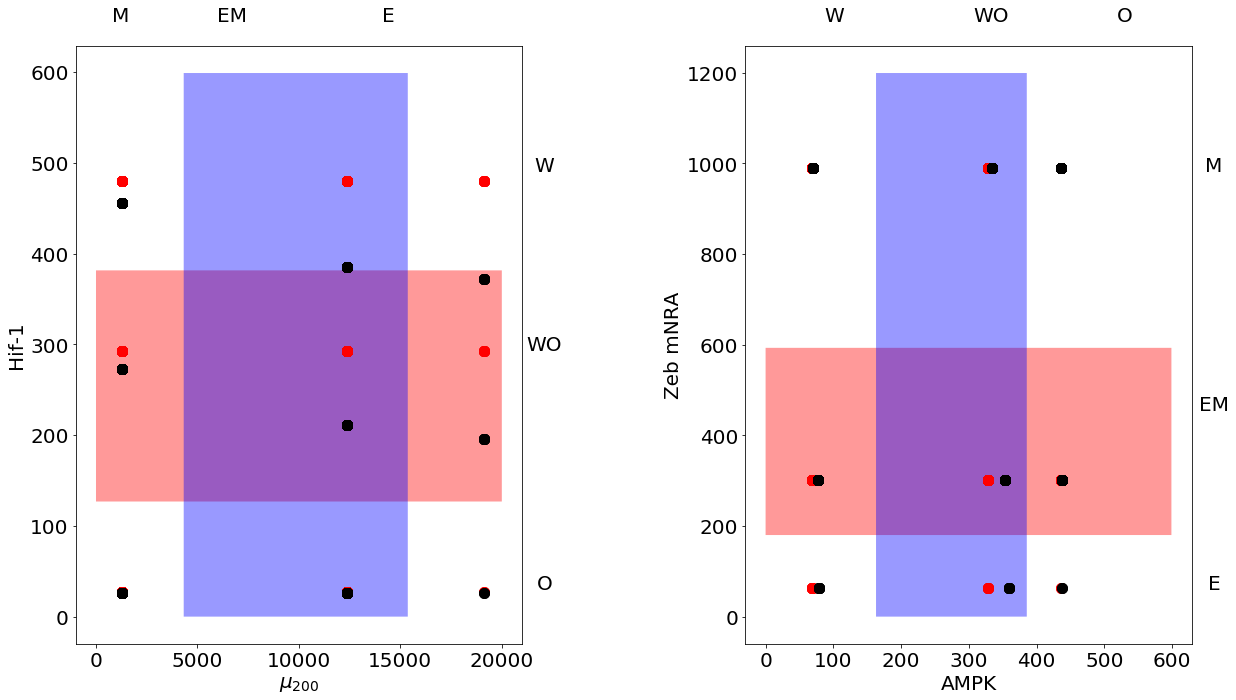

In [13]:
df =pd.read_csv("~/Research/EMT_MR/crosstalk/check/EMT_MR_lamdauH_set7__1000_res.txt").dropna()
plotValuesEMTvMR(df,stateThresholds())

## set 8

li=[1.,1.,1.,]

ymih=[0,0.005,0.01]

yuih=[0,0,0]


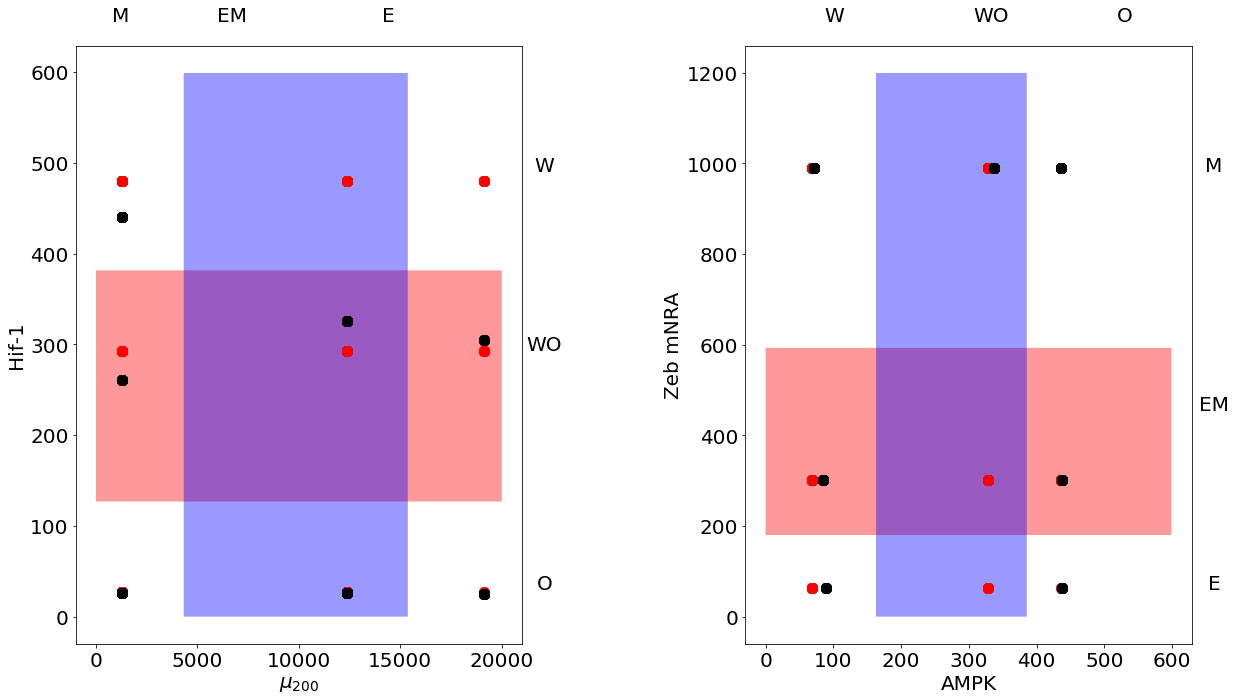

In [14]:
df =pd.read_csv("~/Research/EMT_MR/crosstalk/check/EMT_MR_lamdauH_set8__1000_res.txt").dropna()
plotValuesEMTvMR(df,stateThresholds())

## set 9

li=[1.,1.,1.,]

ymih=[0,0.003,0.005]

yuih=[0,0.1,0.2]


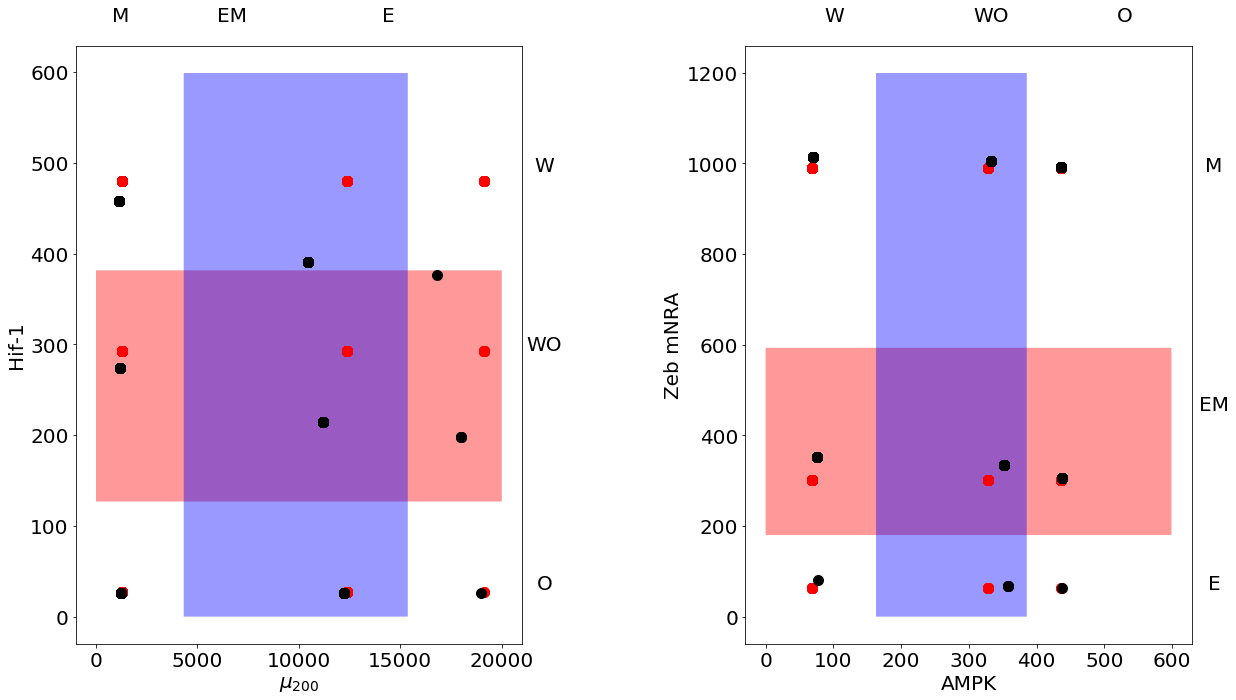

In [15]:
df =pd.read_csv("~/Research/EMT_MR/crosstalk/check/EMT_MR_lamdauH_set9__1000_res.txt").dropna()
plotValuesEMTvMR(df,stateThresholds())

## set 10

li=[1.,1.,1.,]

ymih=[0,0.003,0.005]

yuih=[0,0.5,1.]


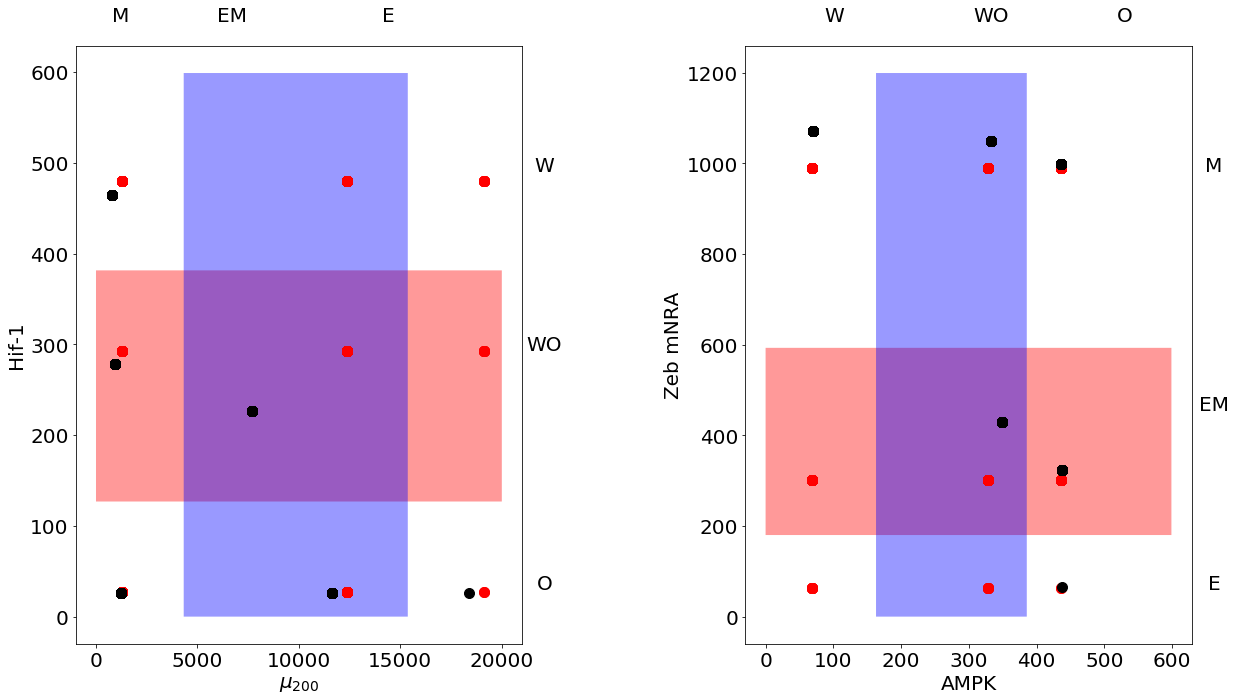

In [16]:
df =pd.read_csv("~/Research/EMT_MR/crosstalk/check/EMT_MR_lamdauH_set10__1000_res.txt").dropna()
plotValuesEMTvMR(df,stateThresholds())